In [135]:
%matplotlib inline

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets
import cv2

#### $ \textbf { 1) What are eigenvalues and eigenvectors?} $

Eigenvalues are special scalars associated with a linear system of equations (or a matrix equation). Similarly, eigenvectors are a special set of vectors associated with a linear system of equations. Both are applicable only to square matrices and usually are observed together - eigenvalues would have corresponding eigenvectors and vice versa.

$ \textbf {Definition of eigenvalues and eigenvectors} $

If we have a matrix $ A $ ($ n * n $) then: 
- eigenvector of this matrix would be any vector (which satisfies the below listed requirements) $ \vec v $ in $ \mathbb{R}^n $ that $ A \vec v=\lambda \vec v $ for given scalar $ \lambda $ (scalar is defined as numbers or values of the elements in a vector part of $ \mathbb{R}$).

- eigenvalue of the same matrix is a scalar $ \lambda $ for which the equation $ A\vec v=\lambda \vec v $ satisfies the below listed requirements.

$ \textbf {Requirements for eigenvalues and eigenvectors}$

 - eigenvectors are by definition non-zero. This is because if zero eigenvectors are considered, then the eigenvalue associated with it would be undefined. 

$$ A0 = 0 = \lambda 0 $$

- for eigenvalue, scalar means to have at least one solution which is $ \neq $ 0. There is no requirement for its value to be $ \neq $ 0, however.

Meaning that only when:

$ \hspace{0.5cm} A\vec v=\lambda \vec v $ with $ \vec v \neq 0 $ then $ \lambda $ is an eigenvalue for $ v $ and $ v $ is an eigenvector for $ \lambda $


- both eigenvectors and eigenvalues are only such if they are collinear (i.e. when two or more given vectors lie along the same given line) or the eigenvector(s) would have to lie on the same line with the origin.

- matrix $ A $ ($ n * n $) would have at most $ n $ eigenvalues due to the fact that eigenvectors with distinct eigenvalues in a squire matrix would are linearly independent (i.e. none of the vectors considered can be represented as a linear combination of the others).

#### $ \textbf { 2) What are eigenbasis and spectrum of a matrix?} $

If we consider again the matrix $ A $ ($ n * n $) and the fact given above that all eigenvector with distinct eigenvalues are linearly independent then the basis of $ \mathbb{R}^n $ which consist of $ A $ 's eigenvectors is called eigenbasis. It is important to be note that a set of eigenvectors can only be considered eigenbasis if the domain of the matrix can be represented by the linear combination of those vectors, otherwise it cannot be an eigenbasis. Which is proven with the below theorem:



$$ A^n(c_1 \vec{v}_1 + c_2 \vec{v}_2 + \ldots + c_k \vec{v}_k) = c_1 \lambda^n_1 \vec{v}_1 + c_2 \lambda^n_2 \vec{v}_2 + \ldots + c_k \lambda^n_k \vec{v}_k$$

However, when calculating eigenbasis, another characteristic of the square matrix will have to be considered as well, called eigenspace.

Lets consider again matrix $ A $ ( with $ \lambda $ being an eigenvalue of it$\,$), then $ \lambda $ - eigenspace of $ A $ is the solution set of $ (A - \lambda I_n)\, \vec{v} = 0 $, i.e., the subspace $ Nul \, (A - \lambda I_n) $. The $ \lambda $ - eigenspace is null space of matrix ($ A - \lambda I_n $) and it is important because that subspace consists of the zero vector and all eigenvectors of $ A $  with eigenvalue of $ \lambda $. What could be deducted from that is that every eigenvalue has infinitely many eigenvectors because a non-zero subspace is infinite. However, it is constrained by the fact that linearly independent eigenvectors of a matrix would still be only at most $ n $ since $ R^n $ would still only have dimenions equal to $ n $.

Additional specificity of this type of matrix is that they have a spectrum. If we consider again our matrix $ A $ then all of the  eigenvalues of it are its spectrum, and are denoted $ \lambda \,(A) $. If $ \lambda \, (A) $ = {$ \lambda_1, \ldots, \lambda_n $}, then the determinant of $ A $ is given by $$ det \, (A) =\lambda_1,\lambda_2 \ldots \lambda_n $$ 

That being said, lets look at example matrix $ (B\,) $ :

$$ B = \begin{bmatrix}
        1 & 0 & 0\\
        0 & 2 & 0 \\
        0 & 0 & 1
       \end{bmatrix} $$

Then three steps would be needed in order to calculate its eigenbasis:

1) To find the eigenvalues of $ B \:$ (by factoring the characteristic polynomial)
2) To find the $ \lambda $ - eigenspaces for each eigenvalue
3) Evaluate if the vectors are equal to $ n $ - as already noted above only if the calculated linearly independent vector are equal to $ n $ then the basis would exist

After calculations are done the eigenbasis for matrix $B$ is:

$$ \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} $$

In [137]:
# func to plot vectors
def plot_vectors(vectors, colors):
    vectors = np.array(vectors)
    start_x = vectors[:, 0]
    start_y = vectors[:, 1]
    len_x = -(vectors[:, 2] - start_x)
    len_y = -(vectors[:, 2] - start_y)
    
    plt.quiver(start_x, start_y, len_x, len_y, angles = "xy", scale_units = "xy", scale = 1.2, color = colors)
    
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    # plt.xticks(range(-2, ))
    plt.gca().set_aspect("equal")
    plt.grid(linewidth = 0.3)
    
    return plt.show()

Eigenbasis: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


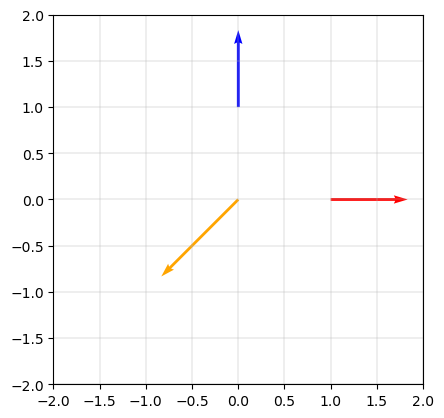

In [138]:
# plotting eigenbasis vectors for matrix B

B = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 1]])

eigenvals, eigenvecs = np.linalg.eig(B)

eigenbasis = np.column_stack((eigenvecs[:,0], eigenvecs[:,1], eigenvecs[:,2]))

# print("Eigenvalues: ", eigenvals)
# print("Eigenvectors: ", eigenvecs)
print("Eigenbasis: ")
print(eigenbasis)

plot_vectors(eigenbasis, ["red", "blue", "orange"])

#### $ \textbf { 3) How do we compute the eigenvalues and eigenvectors of a matrix?} $

As above mentioned - in order to compute the eigenvalues of a given matrix and the characteristic polynomial for it, the calculation starts with formula $(1)$ which can be simplified as $(2)$:

$$ (1)\;  A n =\lambda n $$ 

Which can be simplified to:

$$ (2) \;  An =\lambda n \Leftrightarrow$$
$$ \;\; \;  \;  \; \; \; \; \; \; An - \lambda n = 0 \Leftrightarrow$$
$$\;\; \;  \;  \; \; \; \; \;\; \;An - \lambda In = 0 \Leftrightarrow$$
$$ \;\; \;  \;  \; \; \; \; (A - \lambda I) \, n = 0 $$

The last equation is called $\textbf{characteristic equation} $ and it is the first step (as already described above) to computing eigenvalues and since equation is not invertible (i.e. not every input produces a unique output) can also be presented like this:

$$ det \, (A - \lambda I_k) \, n = 0, $$

where $ det $ is the determinant of a matrix which is a scalar value, taking a square matrix as the input and returning a single number as its output, hence it can be also considered as functions of stretching out and the shrinking in of the matrices.

But lets consider an example with matrix $ C $:

$$ C = \begin{bmatrix}
        2 & 4 \\
        4 & 2 
       \end{bmatrix} $$

Its characteristic equation would be:

$$ det (A - \lambda I_k) \, n = det \begin{bmatrix}
                                                2 - \lambda & 4 \\
                                                4 & 2 - \lambda
                                               \end{bmatrix} $$
                                               
$$ = \lambda^2 - 4 \lambda - 12 = (\lambda + 2)\,(\lambda - 6) \Leftrightarrow $$

From the solution we can conclude that the eigenvalues for this matrix are:

$$ \lambda_1 = -2 \; \& \; \lambda_2 = 6 $$

Now that we have the eigenvalues, in order to calculate the corresponding eigenvectors, we would need to find the non-trivial solutions (i.e. solution out of which at least one variable results in a non-zero value) to:

$$ \begin{bmatrix}
     2 - (-2)\!\!\!  &4\\
     4&2 -(-2)
     \end{bmatrix} 
     \begin{bmatrix}
     x_1 \\
     x_2 \end{bmatrix}  = \vec 0 \; and $$
     
$$ \begin{bmatrix}
     2 - 6\, &4 \\
     4&2 - 6
     \end{bmatrix} 
     \begin{bmatrix}
     x_1 \\
     x_2 \end{bmatrix}  = \vec 0 \; $$

After some calculations - the eigenvectors would be:

$$ \lambda_1 = -2 \; \Rightarrow \vec v_1 = \begin{bmatrix}
         0.7071067 \\
        0.70710678
       \end{bmatrix} $$
       
$$ \lambda_2 = 6 \Rightarrow \vec v_2 = \begin{bmatrix}
         0.70710678 \\
        -0.70710678
       \end{bmatrix}$$

The same could be done with code in Python and the $ \it nympy $ library using $ \it np.linalg.eig $:

In [139]:
# calculating eigenvalues & eigenvectors for matrix C
matrix_C = np.array ([
    [2, 4],
    [4, 2]
])

eigenvalues, eigenvectors = np.linalg.eig(matrix_C)

In [140]:
eigenvalues

array([ 6., -2.])

In [141]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [142]:
# func visualizing eigenvalues & eigenvectors for matrix C

def visualize_transformed_vector(matrix, vec, title, ax):
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(title)
    
    ax.quiver([0], [0], vec[0], vec[1], color="blue", alpha=0.8, units="xy", scale=1)
    
    matrix = np.array([
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ])
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color="orange", linestyle="--", linewidth=2, transform=t + ax.transData)
    
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color="green", linestyle="--", linewidth=2, transform=t + ax.transData)

    new_vec = t.transform([vec[0], vec[1]])
    ax.quiver([0], [0], new_vec[0], new_vec[1], color="purple", units="xy", angles="xy", scale=1)

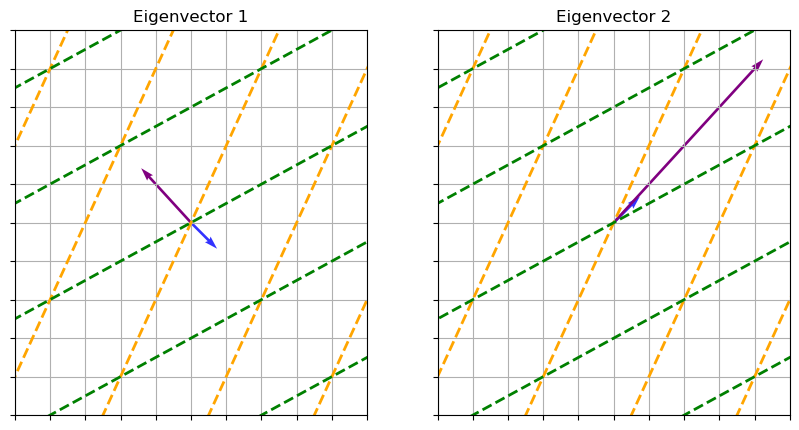

In [143]:
# plotting calculated eigenvectors for matrix C

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

v1 = visualize_transformed_vector(matrix_C, eigenvectors[0], "Eigenvector 1", ax1)
v2 = visualize_transformed_vector(matrix_C, eigenvectors[1], "Eigenvector 2", ax2)

plt.show()

#### $ \textbf { 4) What is projection and how does conserve some shapes? How is the projection problem related to eigenvalues and eigenvectors?} $

Projection is the linear transformation $ P $ from a vector space to itself such that $P^2 = P$. The newly transformed matrix is called a projection matrix (if the matrix is a squared one) and it is usually marked with $ P $ as well. This transformation gives the same results to applying $ P $ once or twice to a vector.

There are 2 cases for this matrix:

-  the projection is orthogonal (orthogonal projection matrix) can be presented as $ (1) $  for real matrix:   

$$ (1) \qquad P^2 = P = P ^ T $$  or as $ (2) $ for complex matrix:


$$ (2) \qquad P^2 = P = P ^ * $$

In an orthogonal projection, any vector $ \vec v $ can be expressed by the other vectors of the matrix:

$$ \vec v =  \vec v_W  + \vec v_{W ^ \perp} $$


-  the projection is non-orthogonal (oblique projection matrix) - which be expressed as below:

$$ P = A \; (B^TA)^{-1} B^T $$

With any projection regardless of its kind, there are certain properties of the shape that remain unchanged. The properties that remain depend on the nature of the subspace and the projection itself. Dimensionality and orientation of the subspace might also influence which of the properties will be impacted and which will not. 

If we consider a project in a 1D subspace then collinearity of the shape will be conserved due to the fact that the projected line will still have to remain in the same line with the original one. When it comes to orthogonal projection - ratios will be generally preserved - meaning that if in the original shape two points were relatively close to one another, they will remain similarly close when projected as well. In particular cases of orthogonal projection like in 2D, angles between the vectors of original shapes will be preserved.

But most notably on a projection matrix - the eigenvalues must be 0 or 1 and regardless of the projection eigenvectors will remain unchanged. 

First fact is proven by and corresponds to the above:

$$ \lambda x = Px = P^2x= P(Px) = P(\lambda x) = \lambda^2 x$$

Second fact is explained by the properties of the eigenvectors - they remain unchanged for every power of A as the eigenvalues equal the same power of the respective eigenvalues.

$$A^n\vec v_i = \lambda^n_i \vec v_i$$



#### $ \textbf { 5)  What are PCA and principal components? How many components are there (as a function of dimensions of the original space)?} $


$ \textbf {Principal component analysis (PCA)} $ is defined as an orthogonal linear transformation that transforms given data to a new coordinate system in such a way that the greatest variance by some scalar projection of the data comes to lie on the first coordinate - called first principal component, second greatest becomes the second principal component and etc. It can be considered as fitting given data into $ p $ - dimensional ellipsoid, where each of its axes is a principal component.

So lets consider a data set which can be fitted into matrix $ D \: (n * p) $ where $ p $ would be the number of variables in the set (also equal to the number of columns of said matrix) and $ n $ is the number of entries under each column and it defines $ n * p $ dimentional vectors $x_1, \ldots, x_p$ to which PCA is to be applied.

Before that can be done - there are several steps to be taken to ensure the algorithm works correctly: 

    1) Standardization of the data 
    
In order to standardize the data set in question, it has to be ensured that each variable has a mean of 0 and standard deviation of 1. That is achieved by appling the below formula (where $ \mu $ is the empirical mean of the data set and $ \sigma $ is the standard diviation) to each variable and achieves exactly what is needed - each variable's weight is equal in the analysis.  

$$ z = \frac {n - \mu} {\sigma} $$

This step is very important because PCA is sensitive when it comes to the variables variations and any big range variables will inevitably dominate when the algorithm is applied and distort the data quality which can lead to incorrect results. 

    2) Computation of the covariance matrix 
    
In order to explain what covariance matrix is, lets explain what $ \textbf {variance} $ and $ \textbf {covariance} $ are: variance is how far the data is spread from the mean of the data; covariance, on the other hand, aims to show the relationship between any two random variables.

Another term to be mentioned is $ \textbf {explained variance}$ which is the delta between the target variance and the variance of prediction error. Usually the higher the explained variance is, the more of the data's story can be explained by the algorithm.

$$ EV = 1 - \frac {{\mathrm{Var}} \,(Y - \hat Y)} {{\mathrm{Var}} \,(Y) }$$

With that said, $ \textbf {covariance matrix} $ is not representative of the original matrix $ D $ but rather focuses on the number of $ p $ from it, thus having dimensions $ p * p $, making it symmetrical. It is used to find and show how closely related the variables are to one another and to the mean of the set (the data spread furthest from the mean has the highest chance of being an outlier which increases the possibility of being statistically insignificant). It can be presented as below:


$$ \begin{bmatrix}
                                                \mathrm{Var} \;(x_1) & \ldots & Cov \; (x_1, x_n) \\
                                                \vdots & \ddots &  \vdots \\
                                                Cov \;(x_n, x_1) & \ldots & \mathrm{Var} \; (x_n)
                                               \end{bmatrix} $$

It is important to be noted that the main diagonal of that matrix would be comprised of the covariance of a variable with itself which is its variance, meaning that the main diagonal will hold the variances of the initial variable. In addition, covariance is also commutative so the portions of the matrix which are split by that diagonal will be equal. Furthermore, as all covariance matrixes are symmetrical, then they by definition they have real eigenvalues and orthogonal eigenvectors.


<div style="text-align:center">
    <img width="33%" src="cov_matrix_.png" alt="Covariance Matrix">
</div>




$$ \textit {Covariance Matrix Example} $$

    3) Identifying the principle components

So once the covariance matrix has been created, it will show us how much covariance there is between the variables - the bigger the variance, the bigger $ \textbf {dispersion}$ it has, i.e. the more information out of the original set it has compacted around it. Now this means also that all of that compacted data can be presented as part of that covariace matrix by applying transformations. Leading to consider that, if in theory, a data can be represented as transformation and the covariance matrix has eigenvalues and eigenvectors, then the pools of data can be represented as linear combinations of the eigenvectors of that said matrix as well. 

This is why calculating the eigenvectors and eigenvalues of the covariance matrix representing the variables of the data set is one of the most important and usuful steps. It is also how the principal components are identified. 

As already pointed out at the beginning, PCA rearranges the data into axes, along which lies most of the data carried by the set, but it also spreads it along the axes in such a way that first axis has to account for the biggest portion of the data (meaning the one with the most variance), then the second one - for the second biggest and so on. The eigenvectors of the covariance matrix are needed so that the directions of the axes with the most variance could be indentified. The eigenvalues, on the other hand, carry the coefficients which show how much variance each principal component accounts for out of the total. From this it could be inferred - in a dataset, the first component will carry the most data out of the set, showing us the direction of the biggest portion of the data. It is important to note that the newly discovered components will have the least amount of variance between them so the covariance will not be a viable option to continue grouping the data further. It can be deducted that the original dimension of the matrix (carrying the original data), would be reduced to the number of the dimensions of the newly created covariance matrix and they would be equal to the principal components (eigenvectors) of the new matrix. 

However, having identified principal components helps us with another possible issue which might be encountered, especially, If we have many variables and we know very little about them. As it may be evident from the above - one principle component would be carrying the information of multiple variables. That essentially means that we no longer need to look at them one by one in order to find a trend in them - we can focus on the aforementioned principle component only. By default the associated variables will be expected to exhibit very similar behaviour. So not only do we find a way to know more about multiple variables easier, but also much faster - making extracting important data out of the set much easier to accomplish. 
    
    4) Feature vector

After determining the significance of each new principle component and ranking them by their importance to the data set, a new challenge might come up - especially if the identified components are not 2 or 3 but rather in the realm of 7 - 10. This is entirely possible when it comes to big data. Such sets remain less straigthforward to work with than one with 2 components, for example. In such cases a determining factor, for which components to be kept and which to discarded, would be the story the researcher would like to tell and to evaluate the impact of potential removal of components from the set. If the story (hypothesis) of the researcher is fitting, then the majority of the data will be kept and results will be useful, even if they end up disproving their original assumption. If the evalution is not done properly, it might result in an important data dump, which carries a significant part of the data story.

In the cases, where more than 2 - 3 dimensions remain, it is good practice to look into the correlation between the multiple components and create a  $ \textbf {correlation matrix}$ as well.  $ \textbf {Correlation}$ can be defined as: 

$$corr \; (X,Y) = \frac {cov \;(X,Y)} {\sigma_X \sigma_Y} = \frac {E \; [ \,{(X - \mu_X) (Y - \mu_Y)}] \,} {\sigma_X \sigma_Y}$$

Where $ X, Y $ are the pair of the variables examined, $ E $ would be the expected value operator, $ \mu $ would be the expected values and $ \sigma $ would be the standard deviation.

The correlation matrix would likely look very similar to the covariation matrix, but both correlation and covariance have key differences listed below:

- Covariance measures the extend to which random variables move in the same manner while correlations shows how strongly the pairs are related to one another. 

- Covariance can vary from  $ - \infty $ to  $ + \infty $ while correlation is limited to -1 and +1.

- Covariance indicates the direction of the linear relationship between variables, while correlation can give information about the strength of it as well.

- Covariance is affected by change of scale while correlation does not. That is true because correlation consideres the standardized variable not its original form.

A correlation matrix might be useful for the researcher to determine which variable can be removed and which can be kept - meaning high correlation would be a prerequisite for one of the variables to be removed as it will be carrying very similar information to the other one. This allows the reducing of dimentions even further. 

 $ \textbf {Feature vector}$ is a matrix that contains the eigenvectors of the components kept.

    4) Recasting of data onto the component axes

Last step of the PCA is to reorient the data from the original axes to the newly derived ones from the principal components. To achieve this, the standardized original data must be multiplied by the feature vector calculated:

$$ Final \; dataset = Feature \; Vector^T * Standartized\;Original\;Set^T $$


#### $ \textbf { 6)  Uses of PCA and eigenvalues and eigenvectors} $

 - Uses of eigenvalues and eigenvectors
 
As presented above eigenvalues and eigenvectors are very useful when it comes to any industry or discipline which uses matrices. Notable uses are in Data Science and Machine Learning, Physics, Engeneering, Mathematics, Design and even the Oil industry. 

Probably its most prominent use is in Data Science as many machine learning algorithms are using eigenvalues and eigenvectors by appling PCA, Feature extraction, Spectral Clustering, Singular Value Decomposition etc. They make big part of the dimention reduction algorithms but also usage can be found in  language processing, face and fingerprint recongnition models. A notable example application is Google's PageRank. 

In Engeneering - they are adopted in Audio Engineering for Shannon-Weaver model - which introduces the notion of noise and is used to correct interfering noises, car stereo systems, vibration analysis, electronics in RLC circuits. Further uses are Control theory, advanced dynamics, bridges construction, car vibration reduction, 3D TVs.

In Physics - Deriving Special Relativity, vibration analysis, simple harmonic oscillators, quantum mechanics, atomic orbitals, etc. 

In Biology - neural networks models, Infectious Disease Model, creation of models of human organs such as retinas etc.

Design and image manipulation use eigenvalues and eigenvectors to compose, decompose and manipulate images. In addition, application is widely spread when it comes to Cinematography - in particular for the creation of 3D movies.

They find application in oil industry (used to locate drilling spots), maps, testing for cracks or deformities in a solid surfaces and many others.

 - Uses of PCA
 
Many of the uses for eigenvalues and eigenvectors are related to PCA match (specifically PCA), which is widely used for dimension reduction in statistics (e.g. $ k $-clustering ), machine learning algorithms, image processing etc. It is utilized to make big data more easily understandable and manipulatable and therefore, it is used in researches where many experiments have to be/are done and there is a need for the data carried to be reduced, so that relevant results can be extracted. 

Other applications include measuring of components of human intelligence, residential differentiation, development indexes, population genetics, market research and indexes of attitude, quantitative finance, Neuroscience, etc.

#### $ \textbf { 7)  PCA implemention} $

In [177]:
def normalize_channels(image):
    def split_channel(array, third_dimension):
        return array[:, :, third_dimension]
    
    red = split_channel(lenses_img, 0)/255
    green = split_channel(lenses_img, 1)/255
    blue = split_channel(lenses_img, 2)/255
    
    return [(red + green + blue), red, green, blue]
    
    
def show_plot(original_title, original_image, modified_title, modified_image):
    fig=plt.figure(figsize = (12, 8))
    fig.add_subplot(121)
    plt.title(original_title)
    plt.imshow(original_image)
    fig.add_subplot(122)
    plt.title(modified_title)
    plt.imshow(modified_image)
    
    return plt.show()

- PCA applied to reduce a 3D image to its first 2 principal components

In [164]:
# import of image
lenses_img = skimage.io.imread("https://static1.makeuseofimages.com/wordpress/wp-content/uploads/2016/10/camera-photo-lens-stock-images.jpg")

In [165]:
# normalization of RGB channels
lenses_img_norm = normalize_channels(lenses_img)[0]

In [166]:
#covariance 
# cov_matrix = np.cov(lenses_img_norm, bias=False)
# plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
# plt.colorbar()
# plt.title('Covariance Matrix')
# plt.show()

In [167]:
# PCA to 2 components (2D)
pca = PCA(n_components=2)
pca.fit(lenses_img_norm)
pca_img_trans = pca.transform(lenses_img_norm)

In [168]:
# transforming image into original form
lenses_rev = pca.inverse_transform(pca_img_trans)

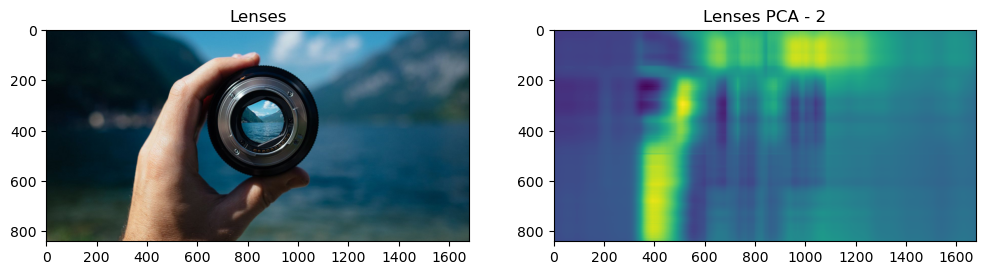

In [170]:
# side by side 3D to 2D
show_plot("Lenses", lenses_img, "Lenses PCA - 2", lenses_rev)

- PCA used to showcase features in a 15D space, projected in 3D

In [212]:
# split and normalization of RGB channels
lenses_img_norm, l_img_red_norm, l_img_green_norm, l_img_blue_norm = normalize_channels(lenses_img)

In [213]:
# PCA to 15 components (15D)
pca = PCA(n_components=15)
pca.fit(l_img_red_norm)
pca_15r = pca.transform(l_img_red_norm)
pca.fit(l_img_green_norm)
pca_15g = pca.transform(l_img_green_norm)
pca.fit(l_img_blue_norm)
pca_15b = pca.transform(l_img_blue_norm)

In [214]:
# transforming image into original form
r_rev = pca.inverse_transform(pca_15r)
g_rev = pca.inverse_transform(pca_15g)
b_rev = pca.inverse_transform(pca_15b)

In [208]:
# merging back channels
img_merged = np.dstack((r_rev,g_rev,b_rev))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


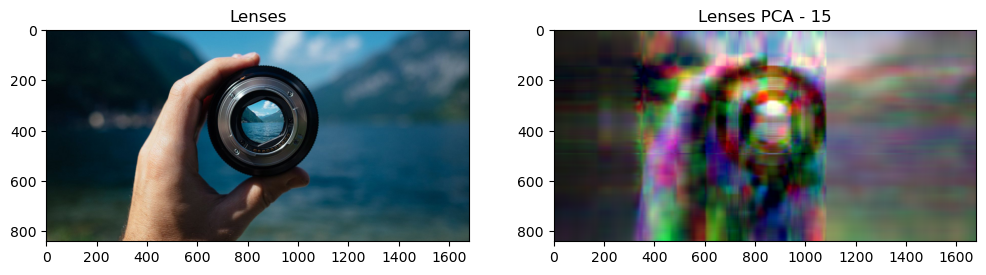

In [ ]:
# side by side 3D and 15D to 3D
show_plot("Lenses", lenses_img, "Lenses PCA - 15", img_merged)

#### $ \textbf { References and sourses:} $ 


  $ \; \textbf {Math:} $


1) https://mathworld.wolfram.com/
2) https://math.stackexchange.com/ 
3) https://en.wikipedia.org/
4) https://sites.calvin.edu/scofield/courses/m256/materials/eigenstuff.pdf
5) https://www.cfm.brown.edu/people/dobrush/am34/MuPad/projection.html
6) https://intuitive-math.club/linear-algebra/eigenbasis/
7) https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202
8) https://nitsri.ac.in/Department/Computer%20Science%20&%20Engineering/BD21.pdf 
9) https://docs.opencv.org/4.x/d1/dee/tutorial_introduction_to_pca.html
10) https://builtin.com/data-science/step-step-explanation-principal-component-analysis
11) https://www.turing.com/kb/guide-to-principal-component-analysis
12) https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
13) https://www.geeksforgeeks.org/ml-principal-component-analysispca/
14) https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
15) https://www.mygreatlearning.com/blog/covariance-vs-correlation/#differences-between-covariance-and-correlation
16) https://www.oreilly.com/library/view/machine-learning-algorithms/9781789347999/49c4b96f-a567-4513-8e91-9f41b0b4dab0.xhtml
17) https://egunawan.github.io/la/notes/lecture15b.pdf
18) https://ocw.mit.edu/courses/18-06sc-linear-algebra-fall-2011/00e9c8f0eafedeab21a3d079a17ed3d8_MIT18_06SCF11_Ses2.2sum.pdf
19) https://dept.math.lsa.umich.edu/~speyer/417/OrthoProj.pdf
20) https://medium.com/analytics-vidhya/linear-algebra-from-strang-3394007ec79c
21) https://www.cfm.brown.edu/people/dobrush/am34/MuPad/projection.html
22) http://shannon.cm.nctu.edu.tw/la/la6s09.pdf
23) https://www2.clarku.edu/faculty/djoyce/ma130/diagonalize.pdf
24) https://dept.math.lsa.umich.edu/~speyer/LinearAlgebraVideos/Lecture9b.pdf
25) https://math.jhu.edu/~bernstein/math201/EIGEN.pdf
26) https://textbooks.math.gatech.edu/ila/eigenvectors.html
27) https://juanitorduz.github.io/the-spectral-theorem-for-matrices/
28) https://www.cuemath.com/algebra/covariance-matrix/
29) https://datahacker.rs/essence-of-linear-algebra-vectors/

  $ \; \textbf {LaTex:} $


1) http://www.cs.put.poznan.pl/ksiek/latexmath.html
2) https://www.physicsread.com/latex/

  $ \; \textbf {Code:} $


1) https://softuni.bg/trainings/resources/video/82318/video-07-april-2023-%D0%B9%D0%BE%D1%80%D0%B4%D0%B0%D0%BD-%D0%B4%D0%B0%D1%80%D0%B0%D0%BA%D1%87%D0%B8%D0%B5%D0%B2-math-concepts-for-developers-march-2023/4058
2) https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
3) https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

  $ \; \textbf {General:} $

1) https://bpb-us-e1.wpmucdn.com/sites.psu.edu/dist/f/7257/files/2013/10/SomeApplications-EigenvaluesEigenvectors.pdf
2) https://bvanderlei.github.io/jupyter-guide-to-linear-algebra/Applications_EV.html
3) http://www.math.utah.edu/~gustafso/s2019/2270/background/ch5/applications-of-eigenanalysis.pdf
4) https://www.geeksforgeeks.org/applications-of-eigenvalues-and-eigenvectors/
5) https://www.intmath.com/matrices-determinants/8-applications-eigenvalues-eigenvectors.php
6) https://online.kitp.ucsb.edu/online/hearing17/nelson/pdf/Nelson_Hearing17_KITP.pdf


